##                                                Beni Food Prescriptive analytics Proj

In [ ]:
pip install statsmodels

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose



In [2]:
df = pd.read_csv("deptsales_by_day.csv", encoding='utf-8')
df

,Date,Department,Baskets,Items,Avg_Items,Sales,Avg_Sale,Scan_Rate,Scan_Sales
0,11/18/20,General Food,2,2,1.0,15.00,7.50,50.0,5.00
1,11/18/20,Misc.,1,1,1.0,15.00,15.00,100.0,15.00
2,11/20/20,General Food,4,6,1.5,19.50,4.87,100.0,19.50
3,11/20/20,Misc.,1,1,1.0,15.00,15.00,100.0,15.00
4,11/22/20,General Food,6,35,5.8,253.00,42.16,100.0,253.00
...,...,...,...,...,...,...,...,...,...
5519,2/21/25,Frozen,1,3,3.0,36.00,36.00,33.3,20.00
5520,2/21/25,General Food,2,4,2.0,26.00,13.00,100.0,26.00
5521,2/22/25,General Food,3,23,7.7,123.21,41.07,100.0,123.21
5522,2/22/25,Pasta/Rice,1,1,1.0,10.99,10.99,100.0,10.99


In [6]:
food_df = pd.read_csv("food_name.csv", encoding = 'utf-8')
pd.set_option("display.max_row", None)
food_df

,Upc,Department,qty,amount($),Name
0,4.990000e+11,Frozen,1,20.00,fish 4
1,4.990000e+11,Pasta/Rice,1,45.00,Cassava Flour
2,4.990000e+11,General Food,1,4.00,Maggi bag
3,4.990000e+11,General Food,1,45.00,Semolina
4,4.990000e+11,Vitamins/Medicine,1,10.00,Rhumine 1%
5,4.990000e+11,Household,1,10.00,Cocoa butter creeme
6,2.000000e+11,Snacks,1,0.50,chips/cookies
7,4.990000e+11,General Food,1,65.00,White corn
8,4.990000e+11,General Food,1,55.00,Bag of rice
9,4.990000e+11,Meat/Fish,1,35.00,Box tilapia fish


In [3]:
df2 = pd.read_csv("deptsales_by_day.csv", encoding='utf-8')
df2

,Date,Department,Baskets,Items,Avg_Items,Sales,Avg_Sale,Scan_Rate,Scan_Sales
0,2020-11-18,General Food,2,2.0,1.0,15.00,7.50,50.0,5.00
1,2020-11-18,Misc.,1,1.0,1.0,15.00,15.00,100.0,15.00
2,2020-11-20,General Food,4,6.0,1.5,19.50,4.87,100.0,19.50
3,2020-11-20,Misc.,1,1.0,1.0,15.00,15.00,100.0,15.00
4,2020-11-22,General Food,6,35.0,5.8,253.00,42.16,100.0,253.00
...,...,...,...,...,...,...,...,...,...
5519,2025-02-21,Frozen,1,3.0,3.0,36.00,36.00,33.3,20.00
5520,2025-02-21,General Food,2,4.0,2.0,26.00,13.00,100.0,26.00
5521,2025-02-22,General Food,3,23.0,7.7,123.21,41.07,100.0,123.21
5522,2025-02-22,Pasta/Rice,1,1.0,1.0,10.99,10.99,100.0,10.99


### preprocessing a categorical column

In [4]:
#counting the amount of time each feature appears in its column
df.Department.value_counts()


Department
General Food           1333
Meat/Fish               993
Drinks                  892
Service Fees            700
Snacks                  632
Cleaning&body           353
Pinless Recharge        239
Household               105
Condiments               65
Clothes                  59
Frozen                   59
Pasta/Rice               33
Misc.                    25
Vitamins/Medicine         9
Hygiene Feminine          8
Calling Card              5
Tobacco                   5
Cleaning                  5
Dairy                     2
Grocery Non-Taxable       2
Name: count, dtype: int64

In [5]:
df_food1 = df.drop(columns = ["Scan_Rate", "Baskets", "Avg_Items", "Avg_Sale", "Sales"])
df_food1

,Date,Department,Items,Scan_Sales
0,2020-11-18,General Food,2.0,5.00
1,2020-11-18,Misc.,1.0,15.00
2,2020-11-20,General Food,6.0,19.50
3,2020-11-20,Misc.,1.0,15.00
4,2020-11-22,General Food,35.0,253.00
...,...,...,...,...
5519,2025-02-21,Frozen,3.0,20.00
5520,2025-02-21,General Food,4.0,26.00
5521,2025-02-22,General Food,23.0,123.21
5522,2025-02-22,Pasta/Rice,1.0,10.99


In [46]:
dept_forecast = df.drop(columns= ["Scan_Rate", "Baskets", "Avg_Items", "Avg_Sale", "Sales", "Scan_Sales", "Department"])
dept_forecast

,Date,Items
0,2020-11-18,2.0
1,2020-11-18,1.0
2,2020-11-20,6.0
3,2020-11-20,1.0
4,2020-11-22,35.0
...,...,...
5519,2025-02-21,3.0
5520,2025-02-21,4.0
5521,2025-02-22,23.0
5522,2025-02-22,1.0


In [47]:

# here we are converting the date column into a date time object
dept_forecast["Date"] = pd.to_datetime(dept_forecast["Date"], format='ISO8601')
print(dept_forecast.head())

        Date  Items
0 2020-11-18    2.0
1 2020-11-18    1.0
2 2020-11-20    6.0
3 2020-11-20    1.0
4 2020-11-22   35.0


In [48]:
#Here were we will put date into an index
dept_forecast.index=dept_forecast["Date"]

del dept_forecast["Date"]

dept_forecast


,Items
Date,
2020-11-18,2.0
2020-11-18,1.0
2020-11-20,6.0
2020-11-20,1.0
2020-11-22,35.0
...,...
2025-02-21,3.0
2025-02-21,4.0
2025-02-22,23.0


Text(0, 0.5, 'Number of Departments')

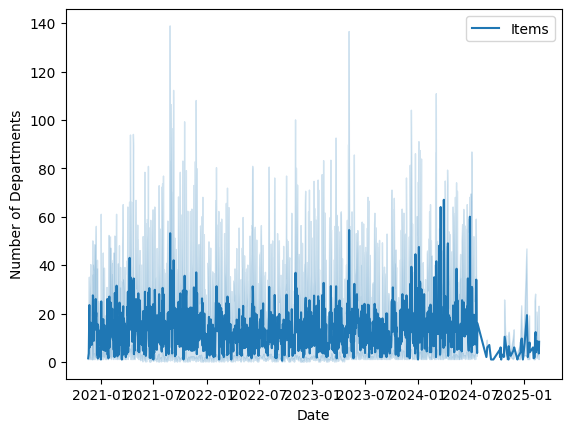

In [49]:
sns.lineplot(dept_forecast)
plt.ylabel("Number of Departments")

In [6]:
# df_food2 = df_food1.drop("Scan_Sales", axis=1)
# df_food2

In [7]:
#Excluding General Food to observe the sales
# df_food3 = df_food1[df_food1['Department'] != 'General Food']
# df_food3

In [8]:
# df_foodfinal = df_food3.drop("Unnamed: 10", axis=1)
# # df_foodfinal

In [9]:
#The get_dummies function in pandas is used for one-hot encoding, converting categorical variables into dummy or indicator variables.
#It transforms a column with distinct values into multiple binary columns, where each column represents a unique value from the original column. 
#For each row, it places a 1 in the column corresponding to the original value and 0 in the others. 
# This is useful for preparing categorical data for machine learning models, which typically require numerical input.

In [10]:
df_food2 = df_food1.join(pd.get_dummies(df['Department']))
pd.set_option("display.max_columns", None)
df_food2

,Date,Department,Items,Scan_Sales,Calling Card,Cleaning,Cleaning&body,Clothes,Condiments,Dairy,Drinks,Frozen,General Food,Grocery Non-Taxable,Household,Hygiene Feminine,Meat/Fish,Misc.,Pasta/Rice,Pinless Recharge,Service Fees,Snacks,Tobacco,Vitamins/Medicine
0,2020-11-18,General Food,2.0,5.00,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,2020-11-18,Misc.,1.0,15.00,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2020-11-20,General Food,6.0,19.50,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,2020-11-20,Misc.,1.0,15.00,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2020-11-22,General Food,35.0,253.00,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,2025-02-21,Frozen,3.0,20.00,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5520,2025-02-21,General Food,4.0,26.00,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5521,2025-02-22,General Food,23.0,123.21,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5522,2025-02-22,Pasta/Rice,1.0,10.99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [11]:
df_food2 = df_food2.map(lambda x: 1 if x is True else 0 if x is False else x)
df_food2

,Date,Department,Items,Scan_Sales,Calling Card,Cleaning,Cleaning&body,Clothes,Condiments,Dairy,Drinks,Frozen,General Food,Grocery Non-Taxable,Household,Hygiene Feminine,Meat/Fish,Misc.,Pasta/Rice,Pinless Recharge,Service Fees,Snacks,Tobacco,Vitamins/Medicine
0,2020-11-18,General Food,2.0,5.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-11-18,Misc.,1.0,15.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2020-11-20,General Food,6.0,19.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2020-11-20,Misc.,1.0,15.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2020-11-22,General Food,35.0,253.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,2025-02-21,Frozen,3.0,20.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5520,2025-02-21,General Food,4.0,26.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5521,2025-02-22,General Food,23.0,123.21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5522,2025-02-22,Pasta/Rice,1.0,10.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


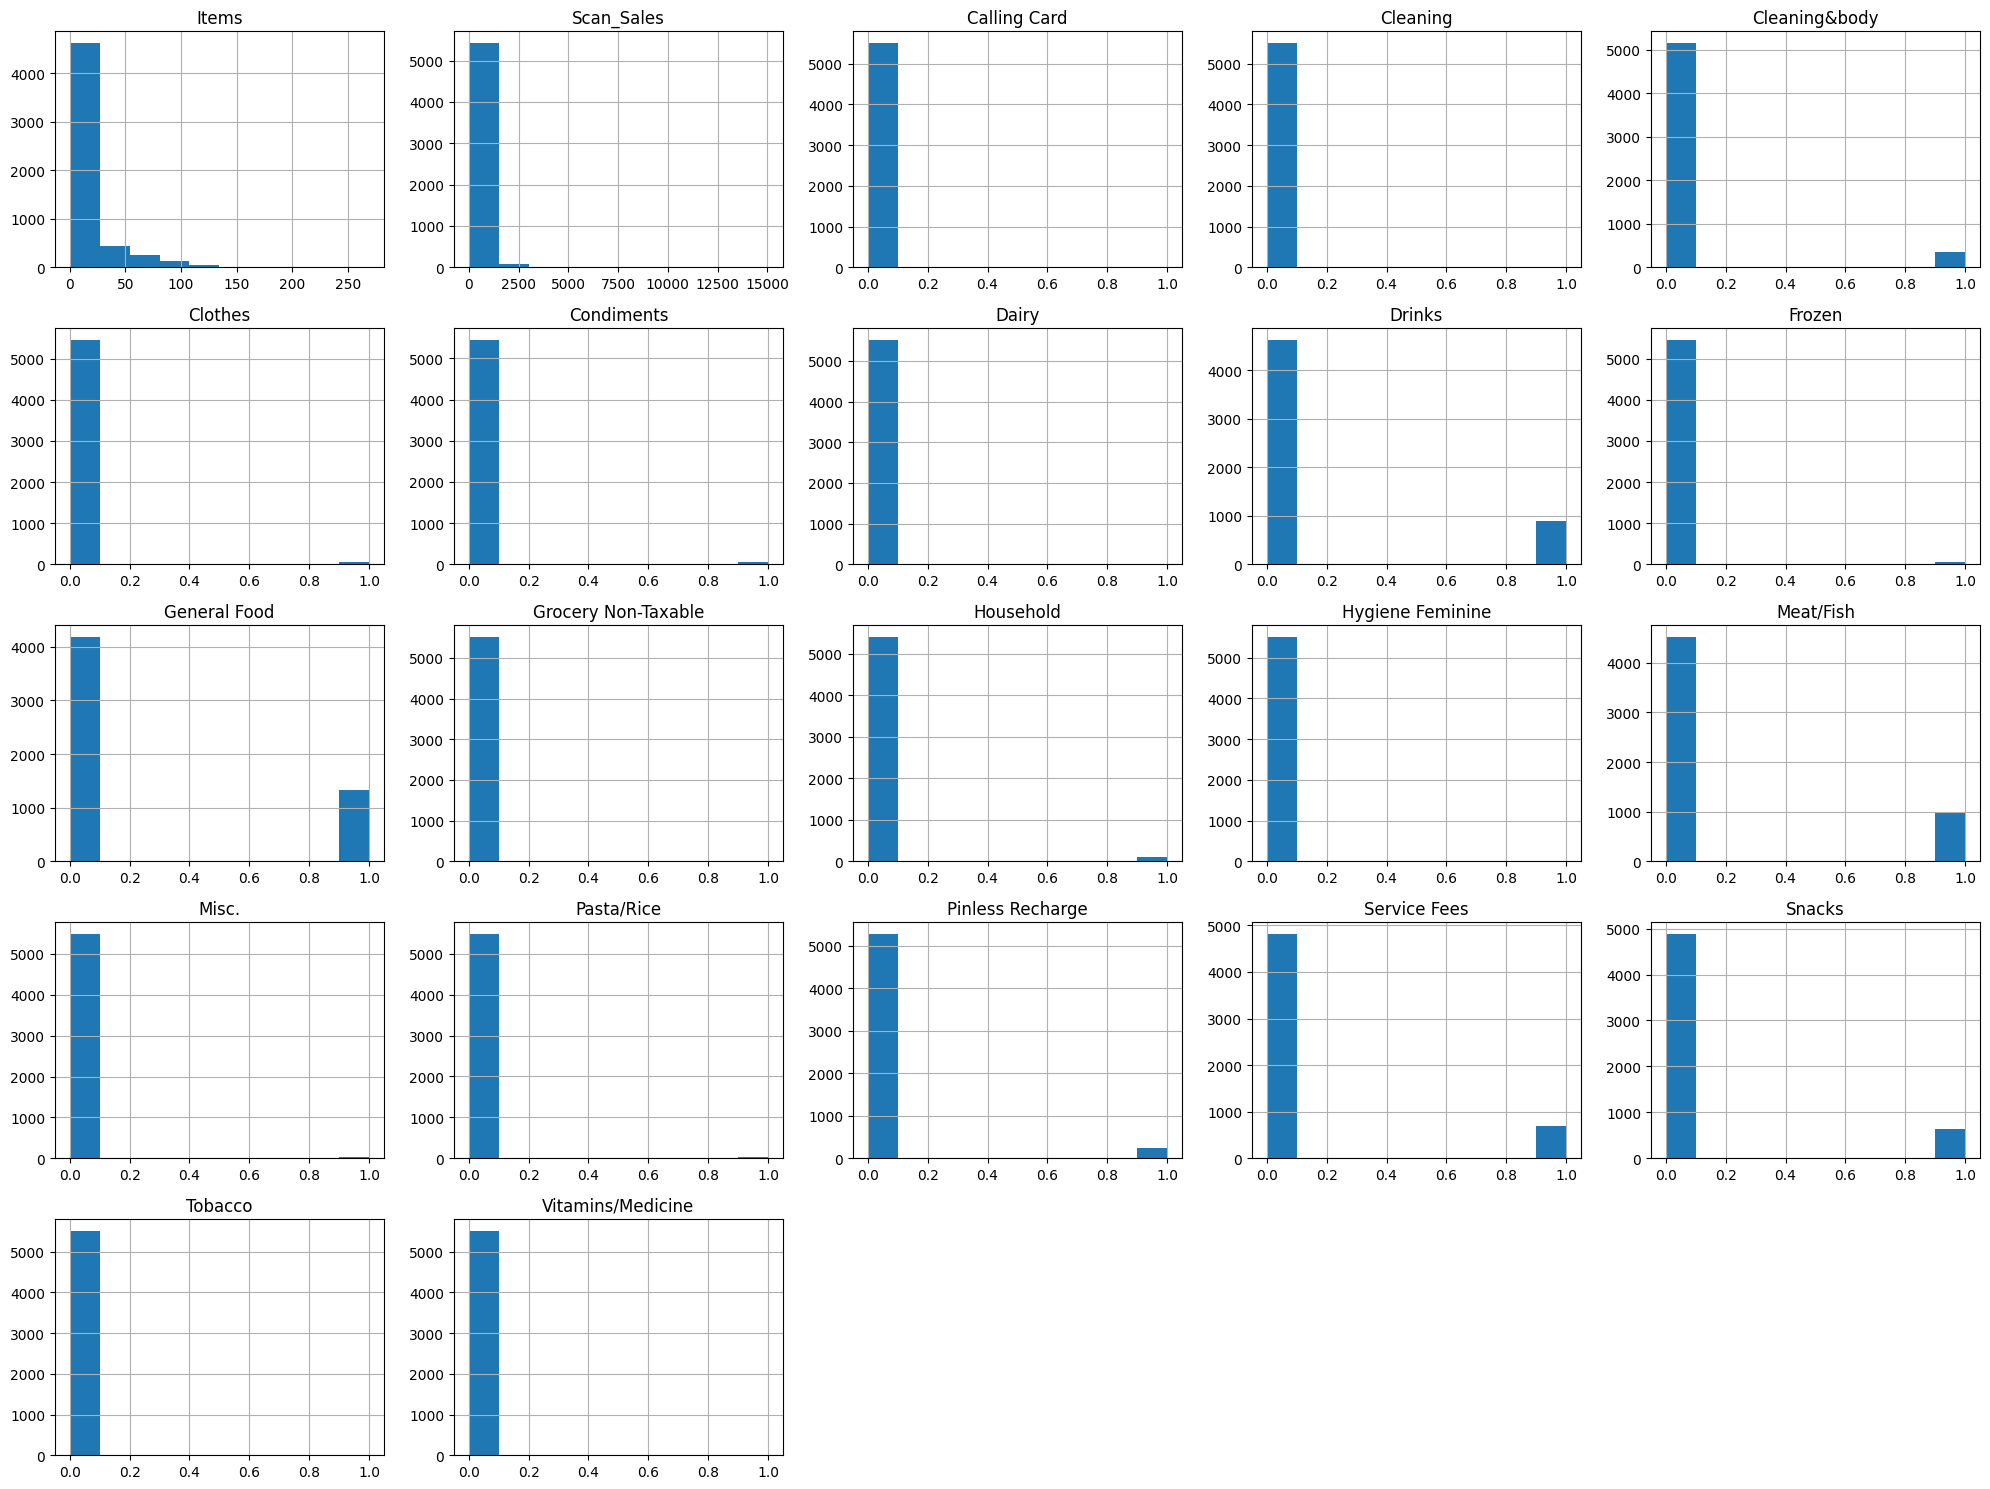

In [12]:
df_food2.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

## Which Department had the greater number of scan sales
## Which Department had the least number of scan sales

In [14]:
sum_data = df_food2.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_data = sum_data.sort_values('Scan_Sales', ascending=False)
sum_data

,Department,Scan_Sales
8,General Food,809501.22
6,Drinks,66419.86
12,Meat/Fish,63899.56
2,Cleaning&body,7243.95
3,Clothes,5066.02
17,Snacks,2811.32
7,Frozen,2026.86
10,Household,2006.48
14,Pasta/Rice,420.10
4,Condiments,410.00


/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1300798837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_data, palette='viridis')  # Added a color palette


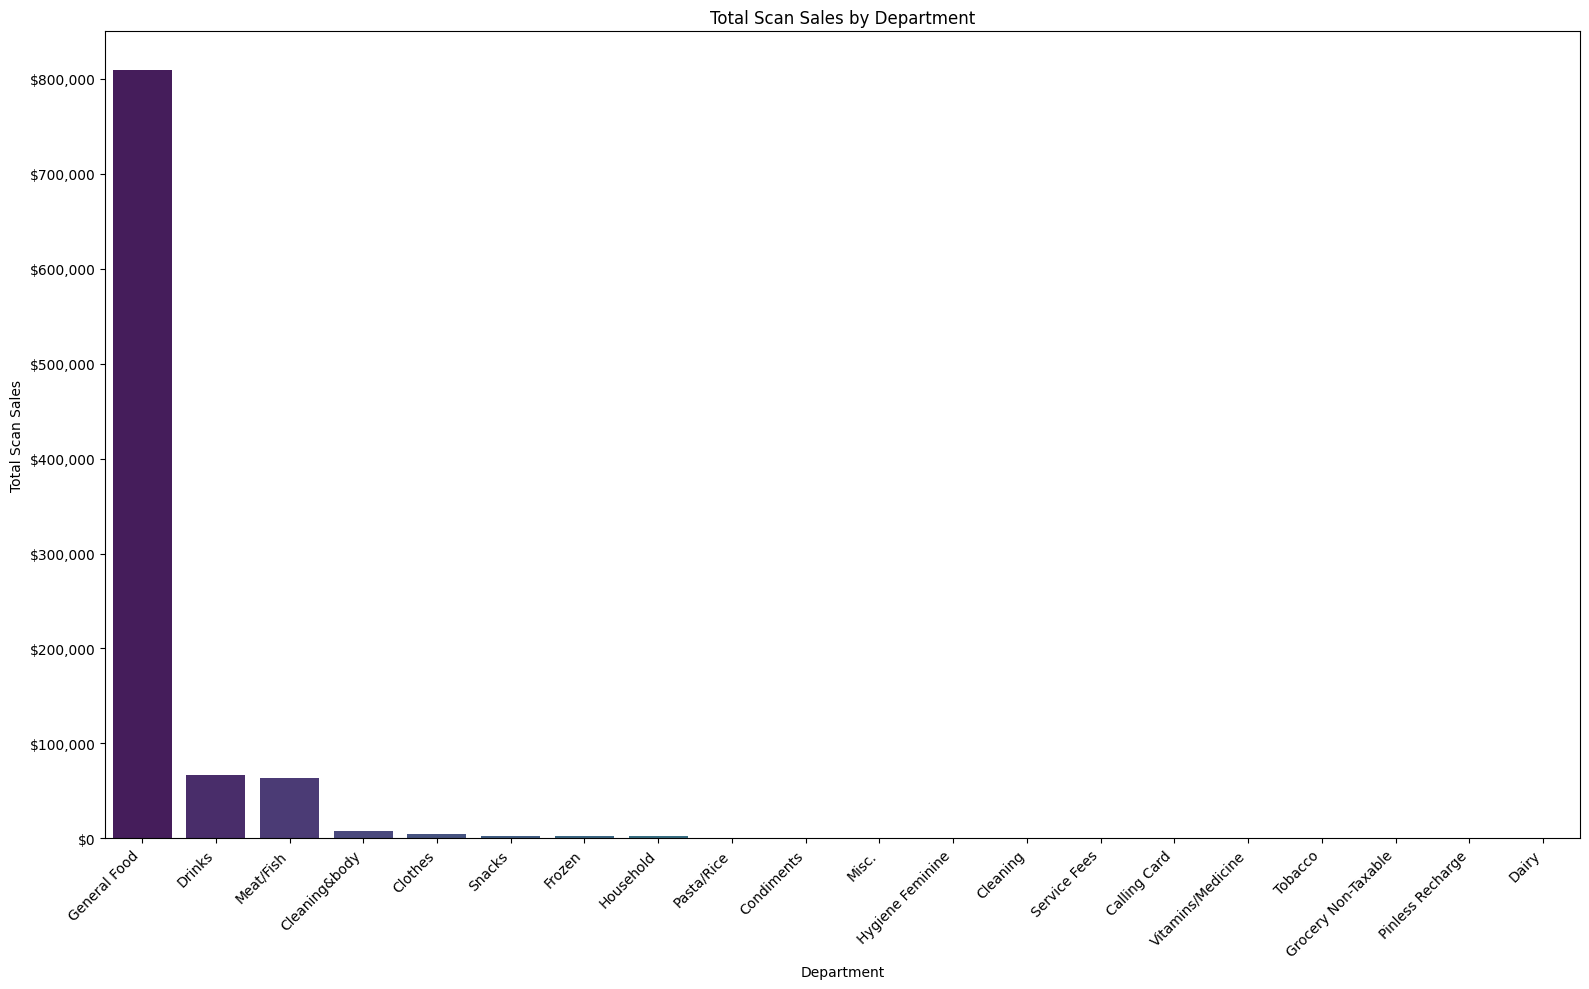

In [15]:

# df_food2 = pd.read_csv('deptsales_by_day.csv')



# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_data = df_food2.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_data = sum_data.sort_values('Scan_Sales', ascending=False)


plt.figure(figsize=(16, 10))
sns.barplot(x='Department', y='Scan_Sales', data=sum_data, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Scan Sales by Department")
plt.xlabel("Department")
plt.ylabel("Total Scan Sales")  #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()

In [16]:
df_food2 = pd.read_csv('deptsales_by_day.csv')


# # # Check for missing sales data
# # if df_food2['Sales'].isnull().any():
# #     print("Warning: Missing sales data found. Consider handling NaN values.")

# sum_data = df_food2.groupby('Department')['Avg_Sale'].sum().reset_index()
# sum_data = sum_data.sort_values('Avg_Sale', ascending=False)


# plt.figure(figsize=(16, 10))
# sns.barplot(x='Department', y='Avg_Sale', data=sum_data, palette='viridis')  # Added a color palette
# plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
# plt.title("Total Average Sales by Department")
# plt.xlabel("Department")
# plt.ylabel("Total Avg_Sales")  #Added y axis label
# plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

# plt.tight_layout() #adjusts plot parameters for a tight layout

# plt.show()

In [17]:
# df_food3 = df_food2[df_food2['Department'] != 'General Food']
# df_food3


In [18]:
df_food1

,Date,Department,Items,Scan_Sales
0,2020-11-18,General Food,2.0,5.00
1,2020-11-18,Misc.,1.0,15.00
2,2020-11-20,General Food,6.0,19.50
3,2020-11-20,Misc.,1.0,15.00
4,2020-11-22,General Food,35.0,253.00
...,...,...,...,...
5519,2025-02-21,Frozen,3.0,20.00
5520,2025-02-21,General Food,4.0,26.00
5521,2025-02-22,General Food,23.0,123.21
5522,2025-02-22,Pasta/Rice,1.0,10.99


In [19]:

# Dropping any features in tems that are 0
df_food1 = df_food1[df_food1['Items'] != 0]
df_food1

,Date,Department,Items,Scan_Sales
0,2020-11-18,General Food,2.0,5.00
1,2020-11-18,Misc.,1.0,15.00
2,2020-11-20,General Food,6.0,19.50
3,2020-11-20,Misc.,1.0,15.00
4,2020-11-22,General Food,35.0,253.00
...,...,...,...,...
5519,2025-02-21,Frozen,3.0,20.00
5520,2025-02-21,General Food,4.0,26.00
5521,2025-02-22,General Food,23.0,123.21
5522,2025-02-22,Pasta/Rice,1.0,10.99


In [20]:
sum_items = df_food1.groupby('Department')['Items'].sum().reset_index()
sum_items = sum_items.sort_values('Items', ascending=False)
sum_items

,Department,Items
8,General Food,61354.0
6,Drinks,4305.0
12,Meat/Fish,4100.0
17,Snacks,3439.0
2,Cleaning&body,800.0
15,Pinless Recharge,290.0
4,Condiments,245.0
10,Household,218.0
3,Clothes,169.0
7,Frozen,161.0


/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1424450376.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_items, palette='viridis')  # Added a color palette


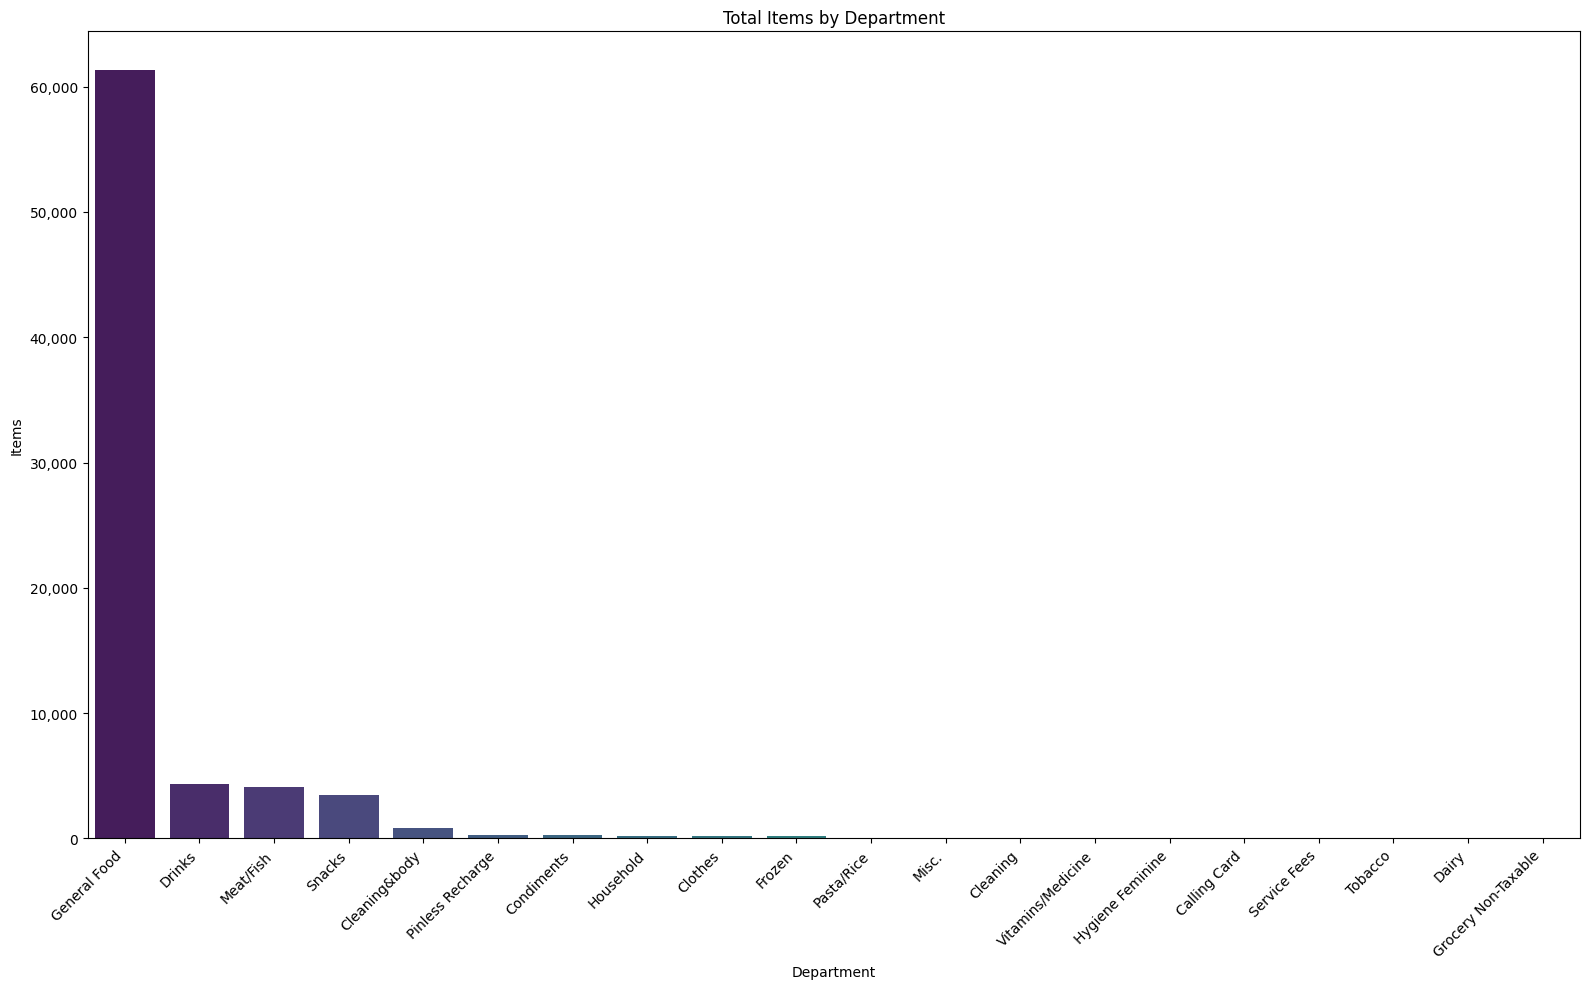

In [21]:
# df_food2 = pd.read_csv('deptsales_by_day.csv')


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_items = df_food2.groupby('Department')['Items'].sum().reset_index()
sum_items = sum_items.sort_values('Items', ascending=False)


plt.figure(figsize=(16, 10))
sns.barplot(x='Department', y='Items', data=sum_items, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department")
plt.xlabel("Department")
plt.ylabel("Items")  #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()

In [22]:
# # Group by 'Department' and sum 'Sales'

# sum_data = df_food3.groupby('Department')['Sales'].sum().reset_index()
# sum_data = sum_data.sort_values('Sales', ascending=False)
# df_food3 = pd.DataFrame()
# # Create bar plot

# plt.figure(figsize=(16, 10))
# sns.barplot(x='Department', y='Sales', data=sum_data, palette='viridis')  # Added a color palette
# plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
# plt.title("Total Sales by Department")
# plt.xlabel("Department")
# plt.ylabel("Total Sales")  #Added y axis label
# plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

# plt.tight_layout() #adjusts plot parameters for a tight layout

# plt.show()

In [23]:

# df_food2 = pd.DataFrame()

# # Plotting
# df['Department'].value_counts().plot(kind='bar')
# plt.xlabel('Department')
# plt.ylabel('Sales')
# plt.title('Overall Number of Sales in each Department')
# plt.show()

In [24]:
# df_food2 = pd.DataFrame()

# #plotting
# df["Department"].value_counts().plot(kind='bar')
# plt.xlabel('Department')
# plt.ylabel('Avg_Sale')
# plt.title('Overall Number of Avg_Sales in each Department')
# plt.show()

In [25]:



# df["Department"].value_counts().plot(kind='bar')
# plt.xlabel('Department')
# plt.ylabel('Items')
# plt.title('Overall Number of Items in each Department')
# plt.show()

In [26]:
# df["Department"].value_counts().plot(kind='bar')
# plt.xlabel('Department')
# plt.ylabel('Avg_Items')
# plt.title('Overall Number of avg_Items in each Department')
# plt.show()

#Data Trends


### Winter of 2020/2021

In [27]:
df_winter20_21 = pd.read_csv("beni_winter20_21.csv", encoding = 'utf-8')
df_spring2021 = pd.read_csv("beni_spring21.csv", encoding = 'utf-8')
df_summer2021 = pd.read_csv("beni_summer21.csv", encoding = 'utf-8')
df_fall2021 = pd.read_csv("beni_fall21.csv", encoding = 'utf-8')


df_winter21_22 = pd.read_csv("beni_winter21_22.csv", encoding = 'utf-8')
df_spring2022 = pd.read_csv("beni_spring22.csv", encoding = 'utf-8')
df_summer2022 = pd.read_csv("beni_summer22.csv", encoding = 'utf-8')
df_fall2022 = pd.read_csv("beni_fall22.csv", encoding = 'utf-8')


df_winter22_23 = pd.read_csv("beni_winter22_23.csv", encoding = 'utf-8')
df_spring2023 = pd.read_csv("beni_spring23.csv", encoding = 'utf-8')
df_summer2023 = pd.read_csv("beni_summer23.csv", encoding = 'utf-8')
df_fall2023 = pd.read_csv("beni_fall23.csv", encoding = 'utf-8')


df_winter23_24 = pd.read_csv("beni_winter23_24.csv", encoding = 'utf-8')
df_spring2024 = pd.read_csv("beni_spring24.csv", encoding = 'utf-8')
df_summer2024 = pd.read_csv("beni_summer24.csv", encoding = 'utf-8')
df_fall2024 = pd.read_csv("beni_fall24.csv", encoding = 'utf-8')
df_winter24_25 = pd.read_csv("beni_winter24_25.csv", encoding = 'utf-8')




vertical_concat = pd.concat([df_winter20_21, df_spring2021, df_summer2021, df_fall2021, df_winter21_22, df_spring2022, df_summer2022, df_fall2022, df_winter22_23, df_spring2023, df_summer2023, df_fall2023, df_winter23_24, df_spring2024, df_summer2024, df_fall2024, df_winter24_25], axis=0, ignore_index=True)

print("Here: ")
vertical_concat[0:200]

Here: 


,Date,Department,Baskets,Items,Avg_Items,Sales,Avg_Sale,Scan_Rate,Scan_Sales
0,11/18/20,General Food,2.0,2.0,1.0,15.0,7.50,50.0,5.0
1,11/18/20,Misc.,1.0,1.0,1.0,15.0,15.00,100.0,15.0
2,11/20/20,General Food,4.0,6.0,1.5,19.5,4.87,100.0,19.5
3,11/20/20,Misc.,1.0,1.0,1.0,15.0,15.00,100.0,15.0
4,11/22/20,General Food,6.0,35.0,5.8,253.0,42.16,100.0,253.0
...,...,...,...,...,...,...,...,...,...
195,2/12/21,Snacks,1.0,4.0,4.0,2.0,2.00,100.0,2.0
196,2/13/21,Drinks,1.0,4.0,4.0,4.5,4.50,100.0,4.5
197,2/13/21,General Food,4.0,21.0,5.3,183.0,45.75,100.0,183.0
198,2/13/21,Meat/Fish,4.0,10.0,2.5,190.0,47.50,100.0,190.0


In [28]:
df_winter20_21 = df_winter20_21.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_spring2021 = df_spring2021.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_summer2021 = df_summer2021.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_fall2021 = df_fall2021.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])

df_winter21_22 = df_winter21_22.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_spring2022 = df_spring2022.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_summer2022 = df_summer2022.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_fall2022 = df_fall2022.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])

df_winter22_23 = df_winter22_23.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_spring2023 = df_spring2023.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_summer2023v= df_summer2023.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_fall2023 = df_fall2023.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])

df_winter23_24 = df_winter23_24.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_spring2024 = df_spring2024.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_summer2024 = df_summer2024.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_fall2024 = df_fall2024.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])
df_winter24_25 = df_winter24_25.drop(columns = ['Baskets', 'Sales', 'Scan_Rate', 'Avg_Sale', 'Avg_Items'])



vertical_concat = pd.concat([df_winter20_21, df_spring2021, df_summer2021, df_fall2021, df_winter21_22, df_spring2022, df_summer2022, df_fall2022, df_winter22_23, df_spring2023, df_summer2023, df_fall2023, df_winter23_24, df_spring2024, df_summer2024, df_fall2024, df_winter24_25], axis=0, ignore_index=True)



vertical_concat

,Date,Department,Items,Scan_Sales,Baskets,Avg_Items,Sales,Avg_Sale,Scan_Rate
0,11/18/20,General Food,2.0,5.00,NaN,NaN,NaN,NaN,NaN
1,11/18/20,Misc.,1.0,15.00,NaN,NaN,NaN,NaN,NaN
2,11/20/20,General Food,6.0,19.50,NaN,NaN,NaN,NaN,NaN
3,11/20/20,Misc.,1.0,15.00,NaN,NaN,NaN,NaN,NaN
4,11/22/20,General Food,35.0,253.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6651,2/21/25,Frozen,3.0,20.00,NaN,NaN,NaN,NaN,NaN
6652,2/21/25,General Food,4.0,26.00,NaN,NaN,NaN,NaN,NaN
6653,2/22/25,General Food,23.0,123.21,NaN,NaN,NaN,NaN,NaN
6654,2/22/25,Pasta/Rice,1.0,10.99,NaN,NaN,NaN,NaN,NaN


In [29]:
df_winter20_21.value_counts('Department')

Department
General Food     94
Meat/Fish        58
Snacks           34
Drinks           33
Cleaning&body     6
Misc.             3
Name: count, dtype: int64

In [30]:
sum_data20_21 = df_winter20_21.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_data20_21 = sum_data20_21.sort_values('Scan_Sales', ascending=False)


sum_spring2021 = df_spring2021.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_spring2021 = sum_spring2021.sort_values('Scan_Sales', ascending=False)


sum_summer2021 = df_summer2021.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_summer2021 = sum_summer2021.sort_values('Scan_Sales', ascending=False)


sum_fall2021 = df_summer2021.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_summer2021 = sum_summer2021.sort_values('Scan_Sales', ascending=False)


vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021, sum_summer2021], axis=0, ignore_index=True)




vertical_concat_sum

,Department,Scan_Sales
0,General Food,23871.51
1,Meat/Fish,2516.00
2,Drinks,850.25
3,Snacks,92.04
4,Cleaning&body,63.00
5,Misc.,45.00
6,General Food,32490.65
7,Meat/Fish,3599.96
8,Drinks,1498.80
9,Cleaning&body,316.00


/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_data20_21, palette='viridis')  # Added a color palette


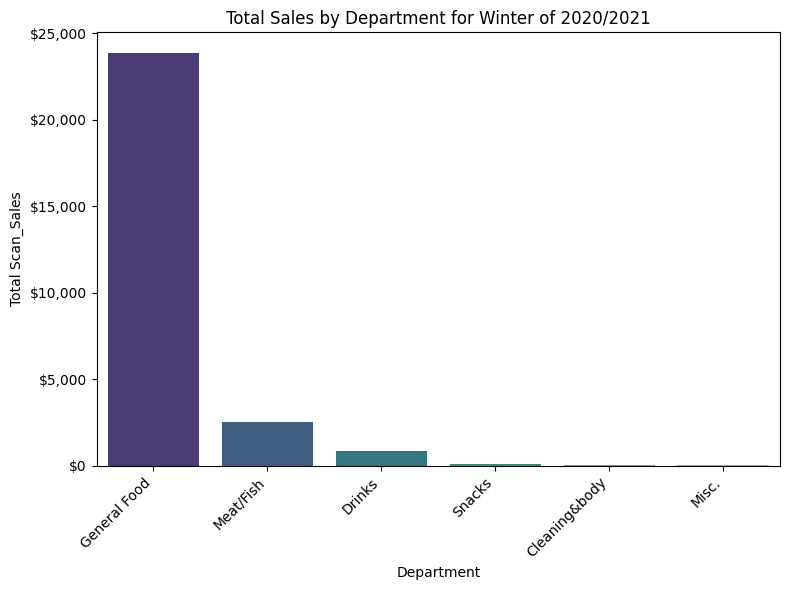

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_spring2021, palette='viridis')  # Added a color palette


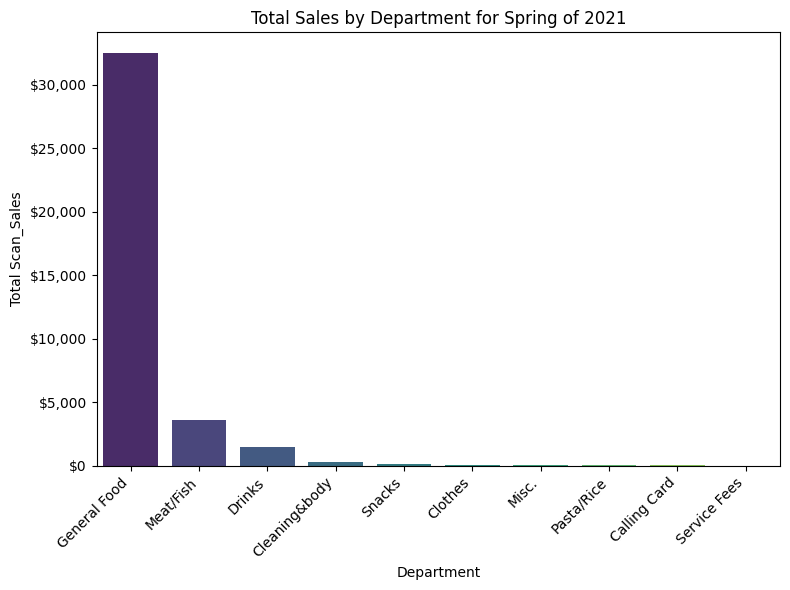

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_summer2021, palette='viridis')  # Added a color palette


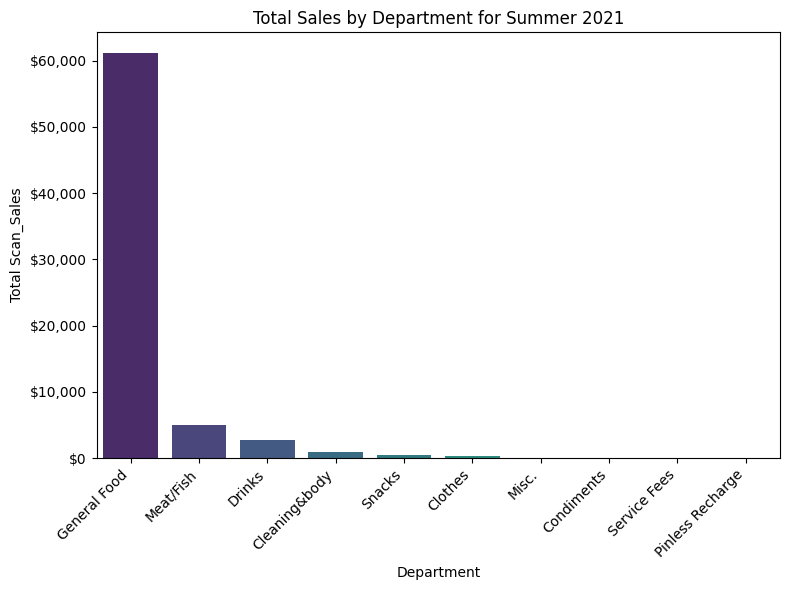

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_fall2021, palette='viridis')  # Added a color palette


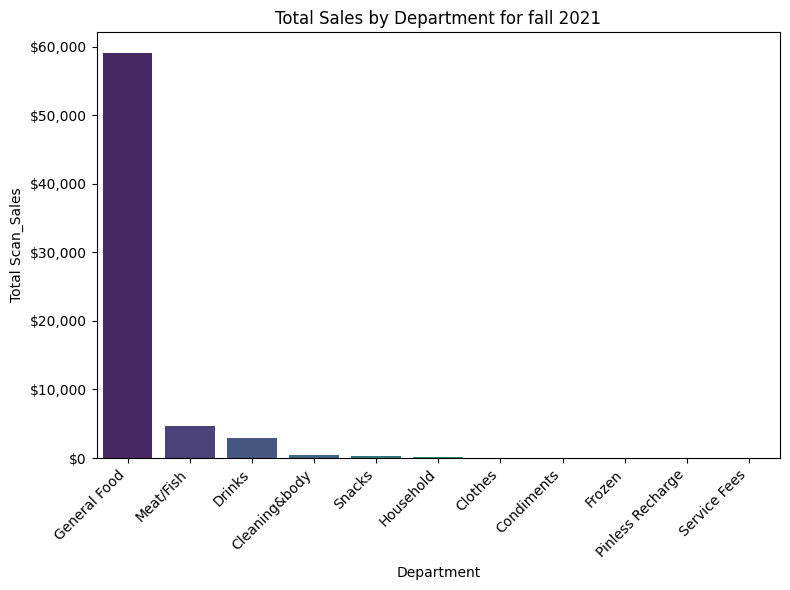

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_data21_22, palette='viridis')  # Added a color palette


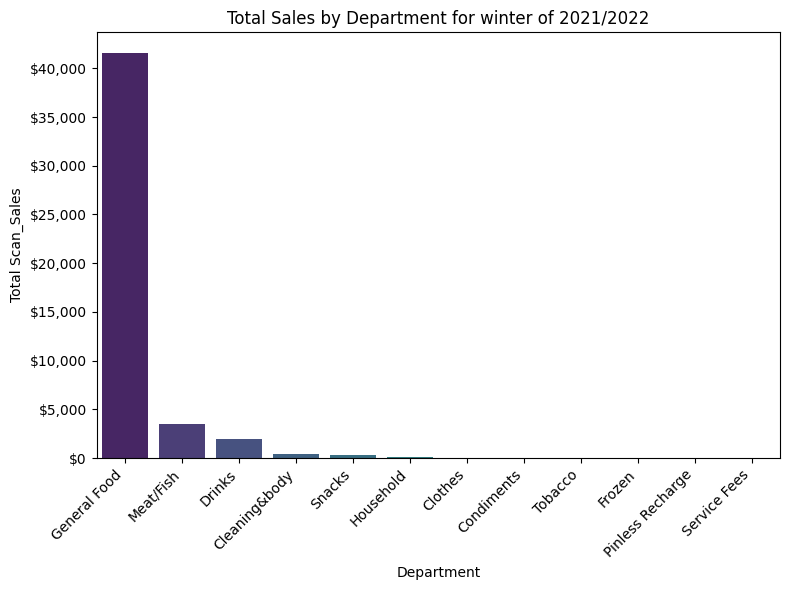

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_spring2022, palette='viridis')  # Added a color palette


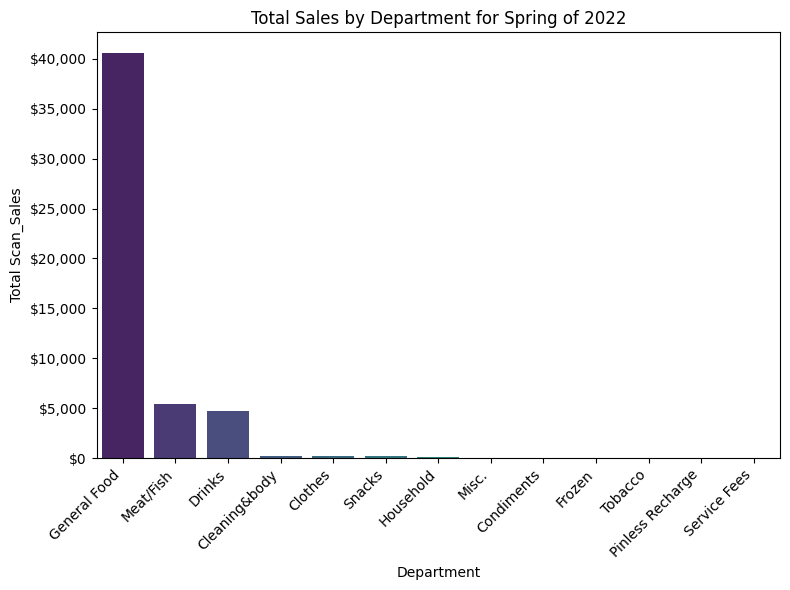

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_summer2022, palette='viridis')  # Added a color palette


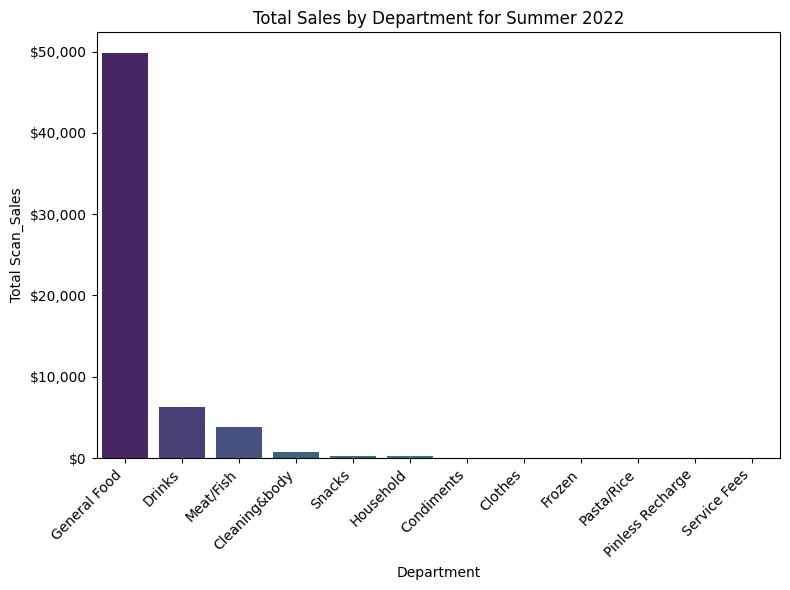

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_fall2022, palette='viridis')  # Added a color palette


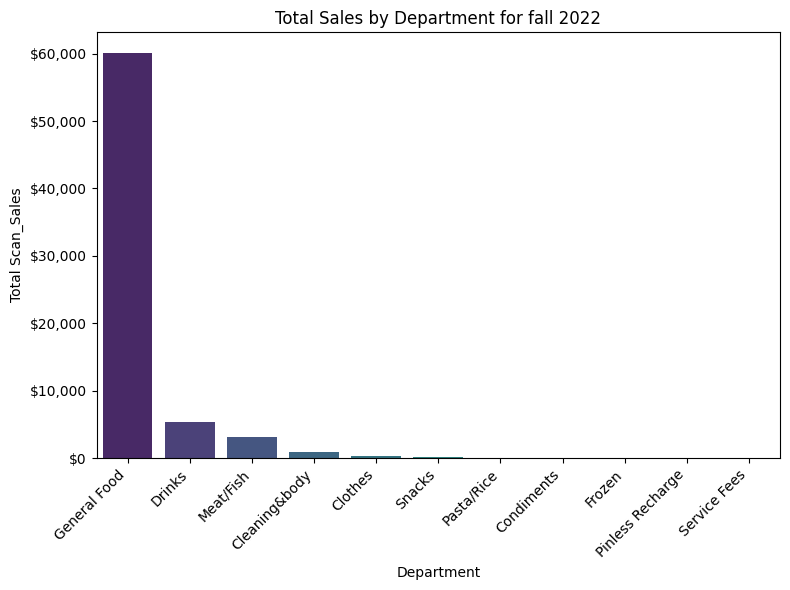

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:200: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_data22_23, palette='viridis')  # Added a color palette


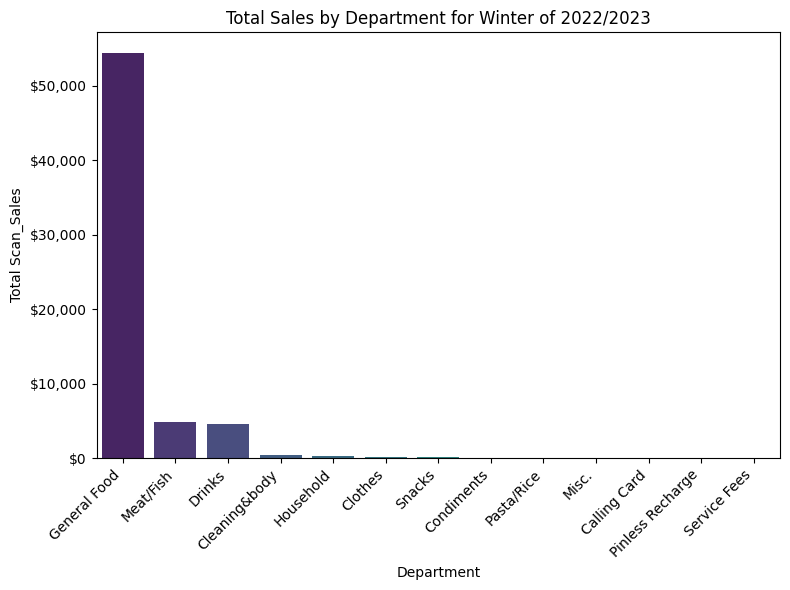

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_spring2023, palette='viridis')  # Added a color palette


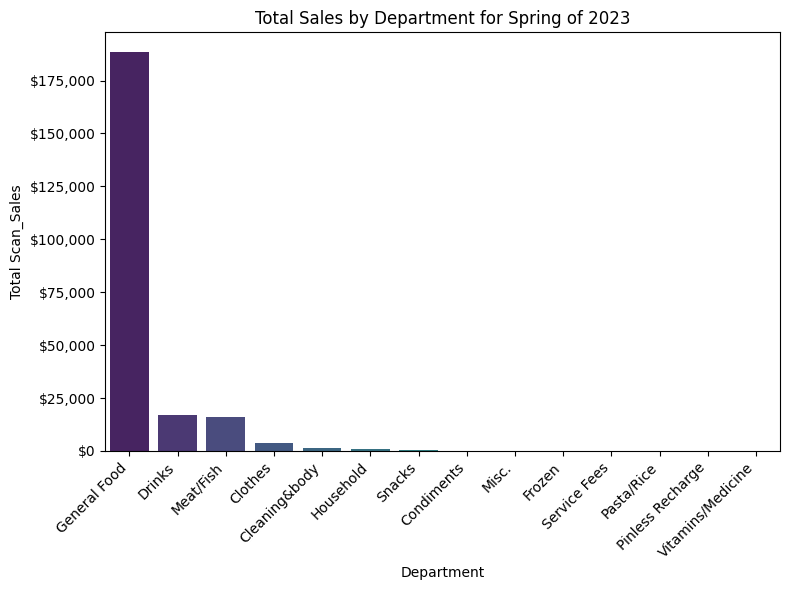

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_summer2023, palette='viridis')  # Added a color palette


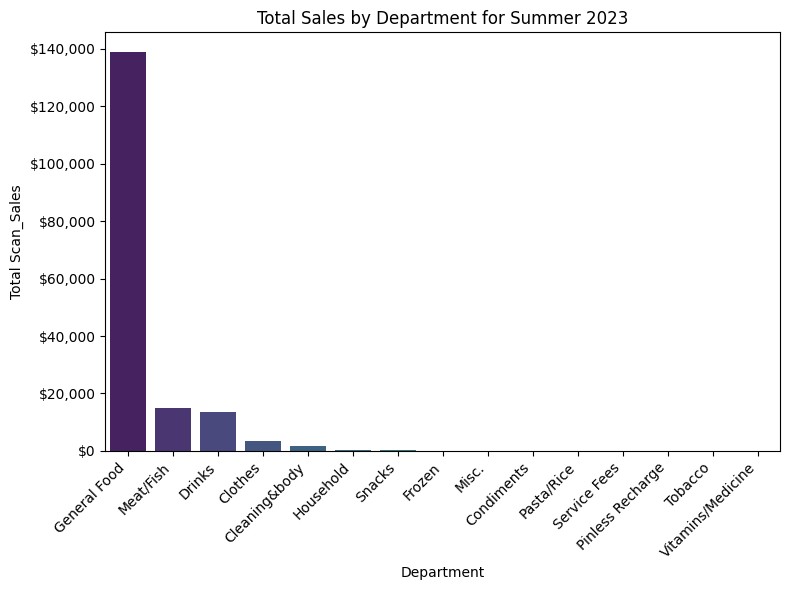

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_fall2023, palette='viridis')  # Added a color palette


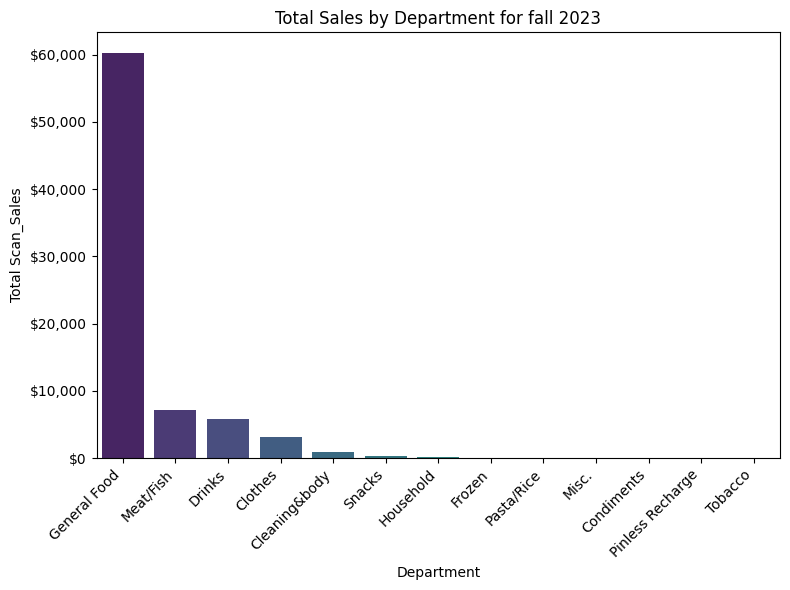

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_data23_24, palette='viridis')  # Added a color palette


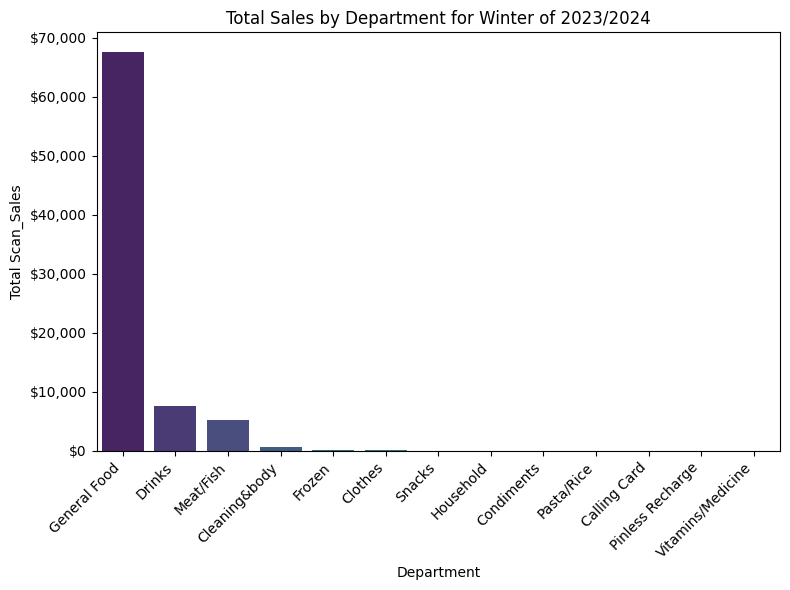

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:311: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_spring2024, palette='viridis')  # Added a color palette


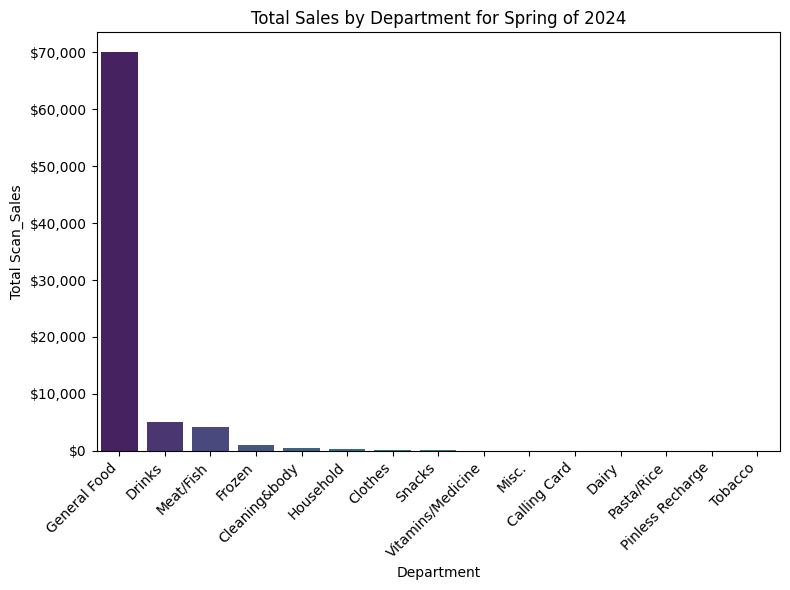

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:336: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_summer2024, palette='viridis')  # Added a color palette


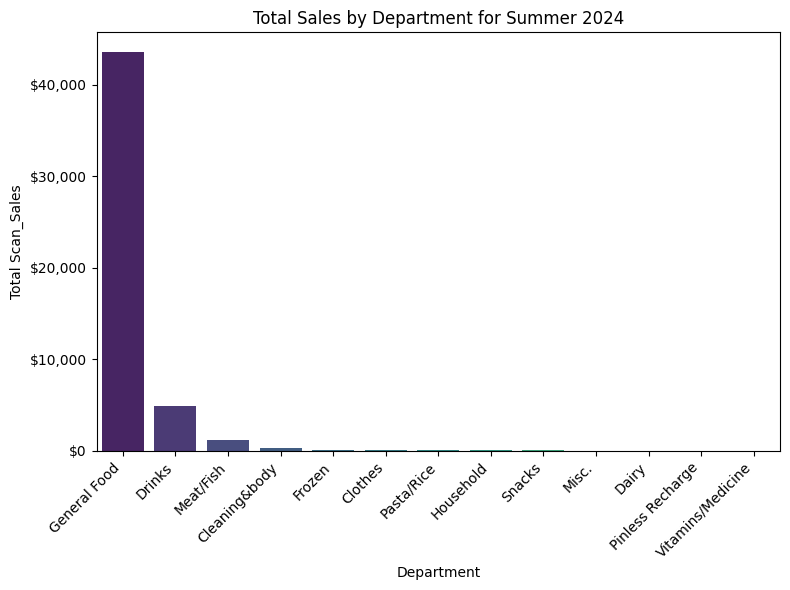

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:358: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_fall2024, palette='viridis')  # Added a color palette


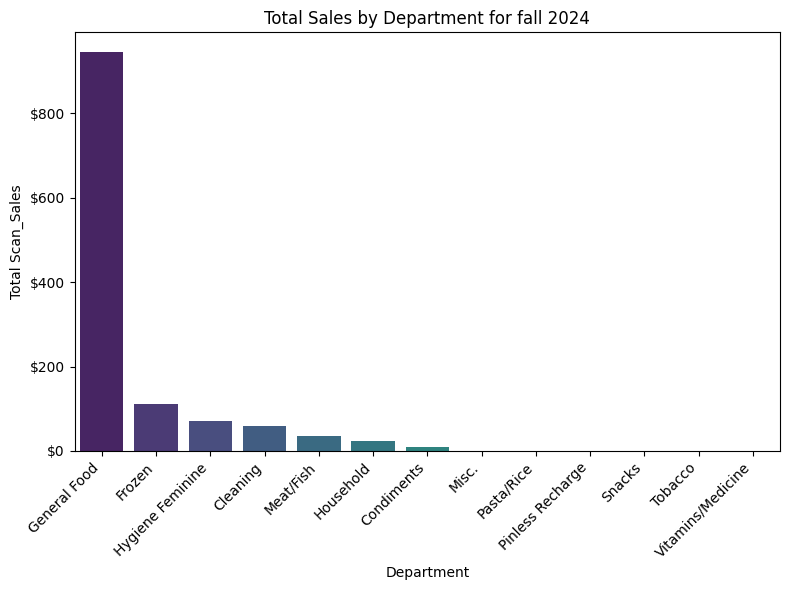

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/3928198848.py:380: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Scan_Sales', data=sum_data24_25, palette='viridis')  # Added a color palette


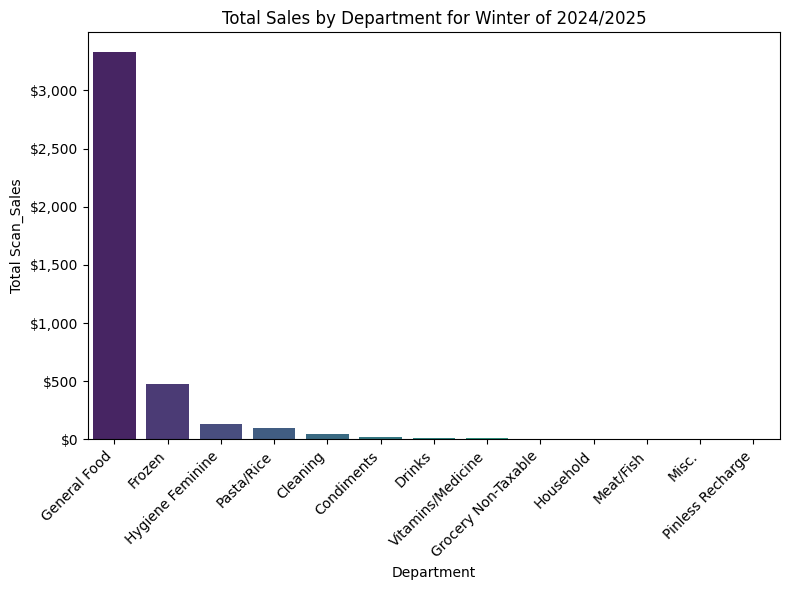

In [ ]:
# Check for missing sales data
# if df_food2['Sales'].isnull().any():
# print("Warning: Missing sales data found. Consider handling NaN values.")

sum_data20_21 = df_winter20_21.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_data20_21 = sum_data20_21.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_data20_21, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Winter of 2020/2021")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_spring2021 = df_spring2021.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_spring2021 = sum_spring2021.sort_values('Scan_Sales', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_spring2021, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Spring of 2021")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_summer2021 = df_summer2021.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_summer2021 = sum_summer2021.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_summer2021, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Summer 2021")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_fall2021 = df_fall2021.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_fall2021 = sum_fall2021.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_fall2021, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for fall 2021")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


#New data



sum_data21_22 = df_winter21_22.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_data21_22 = sum_data21_22.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_data21_22, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for winter of 2021/2022")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_spring2022 = df_spring2022.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_spring2022 = sum_spring2022.sort_values('Scan_Sales', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_spring2022, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Spring of 2022")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_summer2022 = df_summer2022.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_summer2022 = sum_summer2022.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_summer2022, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Summer 2022")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_fall2022 = df_fall2022.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_fall2022 = sum_fall2022.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_fall2022, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for fall 2022")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()




#new data



sum_data22_23 = df_winter22_23.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_data22_23 = sum_data22_23.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_data22_23, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Winter of 2022/2023")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_spring2023 = df_spring2023.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_spring2023 = sum_spring2023.sort_values('Scan_Sales', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_spring2023, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Spring of 2023")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_summer2023 = df_summer2023.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_summer2023 = sum_summer2023.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_summer2023, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Summer 2023")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_fall2023 = df_fall2023.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_fall2023 = sum_fall2023.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_fall2023, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for fall 2023")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()







#new data

sum_data23_24 = df_winter23_24.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_data23_24 = sum_data23_24.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_data23_24, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Winter of 2023/2024")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_spring2024 = df_spring2024.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_spring2024 = sum_spring2024.sort_values('Scan_Sales', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_spring2024, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Spring of 2024")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_summer2024 = df_summer2024.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_summer2024 = sum_summer2024.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_summer2024, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Summer 2024")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_fall2024 = df_fall2024.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_fall2024 = sum_fall2024.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_fall2024, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for fall 2024")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_data24_25 = df_winter24_25.groupby('Department')['Scan_Sales'].sum().reset_index()
sum_data24_25 = sum_data24_25.sort_values('Scan_Sales', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Scan_Sales', data=sum_data24_25, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Sales by Department for Winter of 2024/2025")
plt.xlabel("Department")
plt.ylabel("Total Scan_Sales") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()







/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_data20_21, palette='viridis')  # Added a color palette


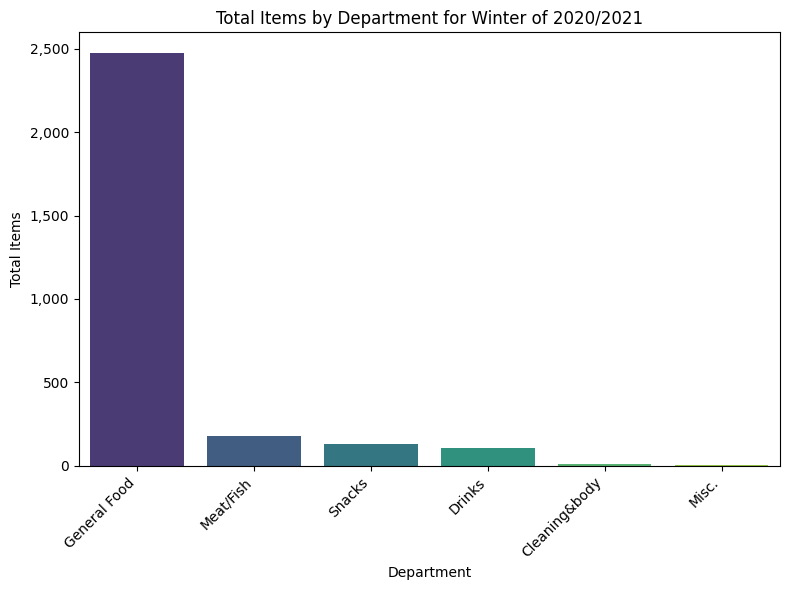

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_spring2021, palette='viridis')  # Added a color palette


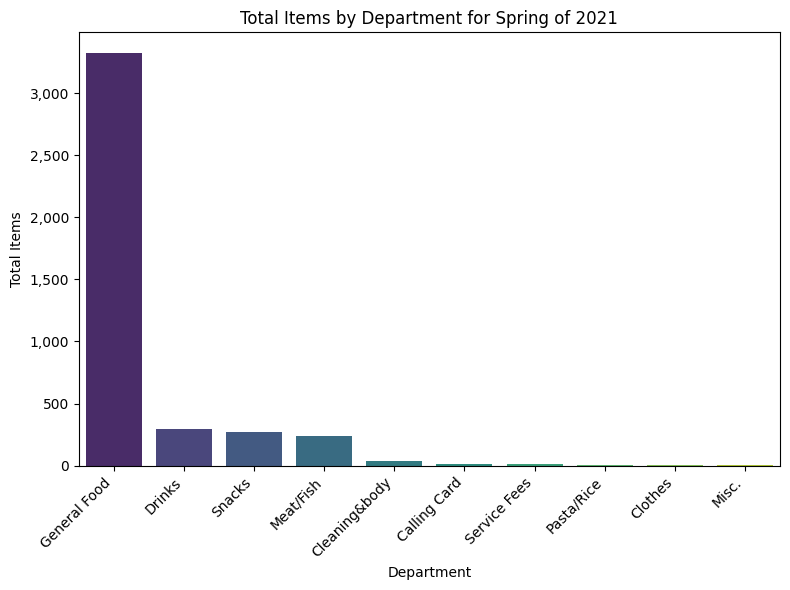

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_summer2021, palette='viridis')  # Added a color palette


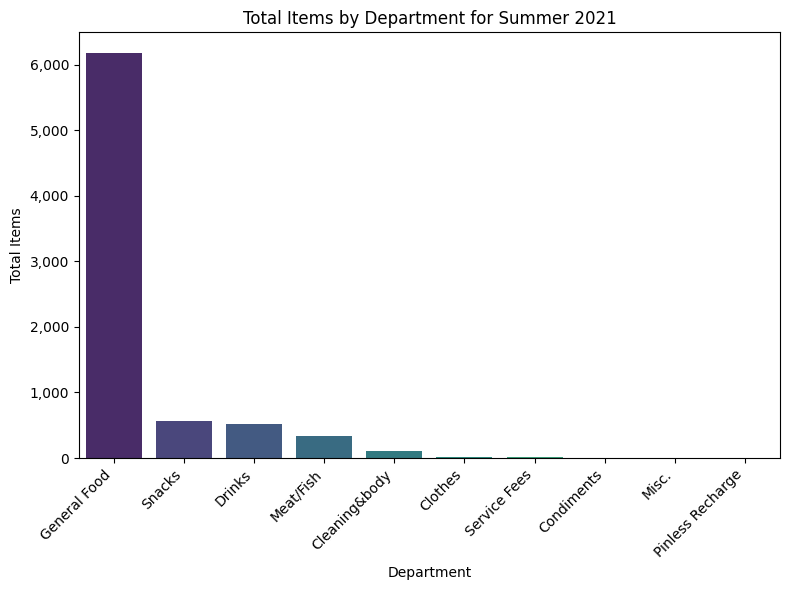

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_fall2021, palette='viridis')  # Added a color palette


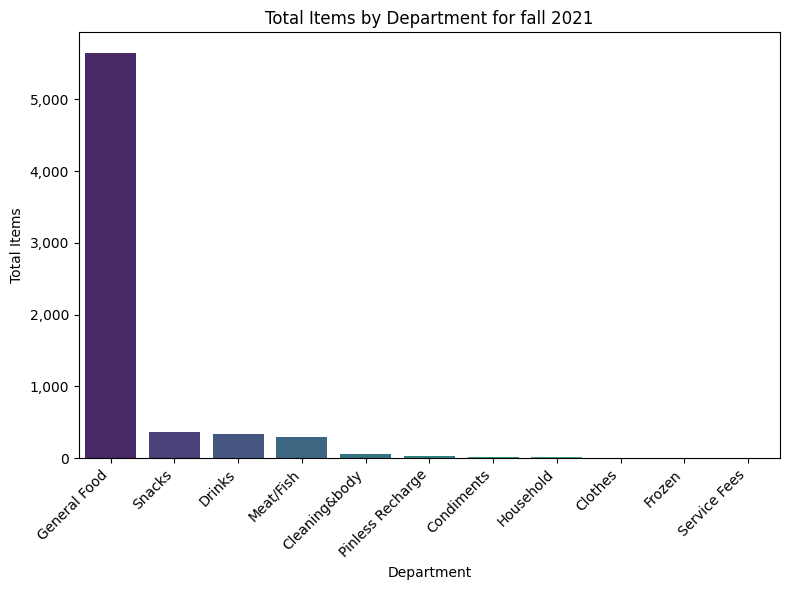

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_data21_22, palette='viridis')  # Added a color palette


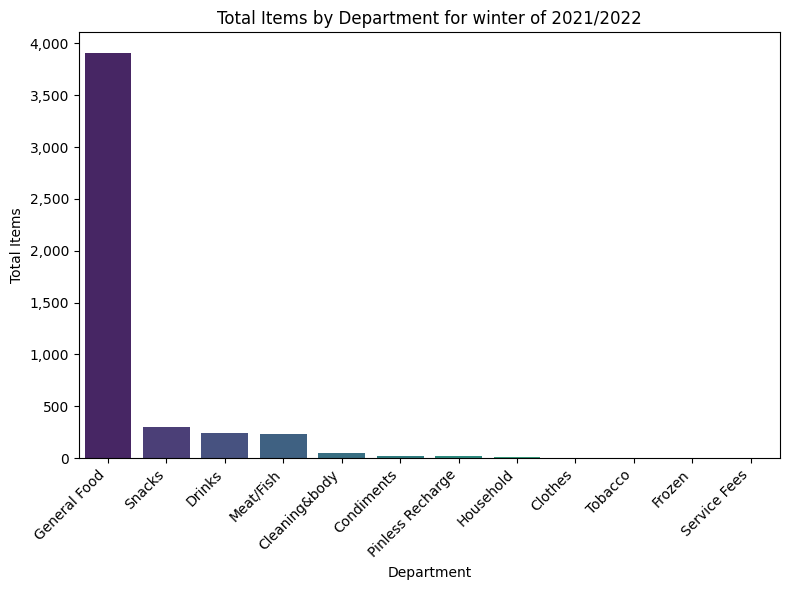

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_spring2022, palette='viridis')  # Added a color palette


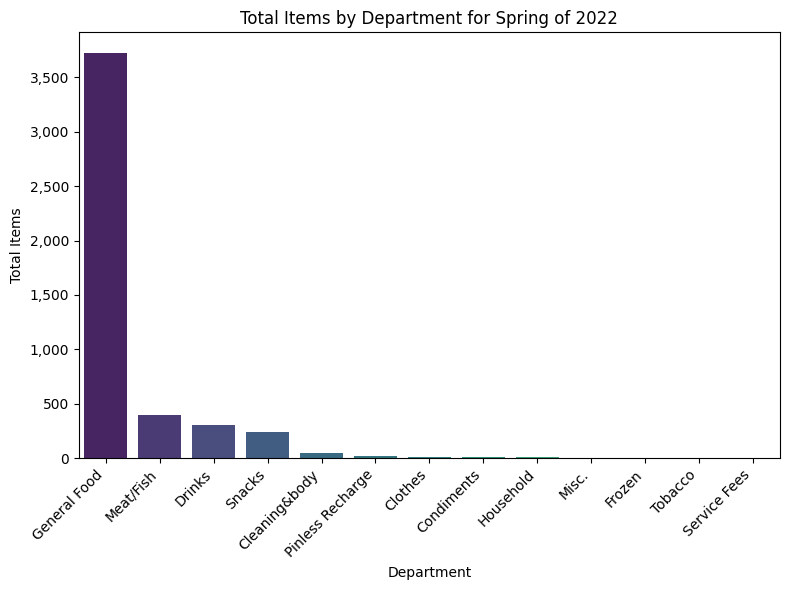

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_summer2022, palette='viridis')  # Added a color palette


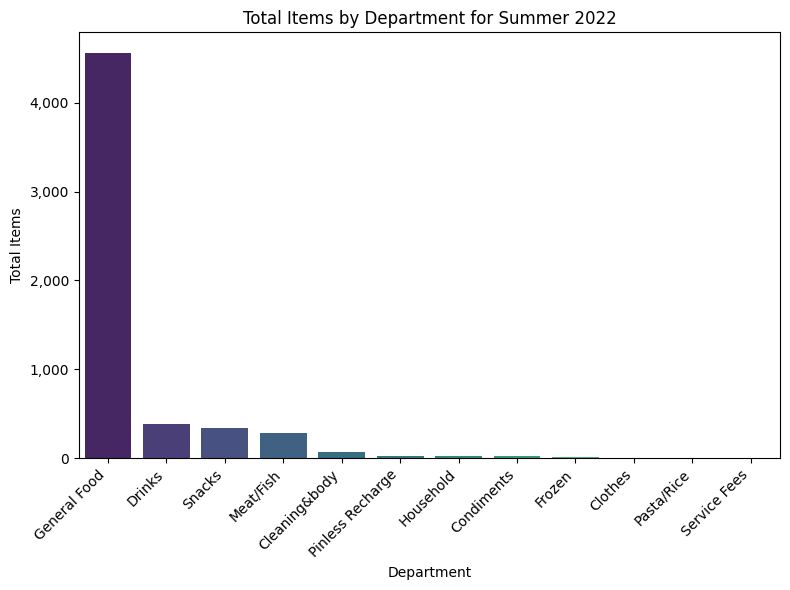

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_fall2022, palette='viridis')  # Added a color palette


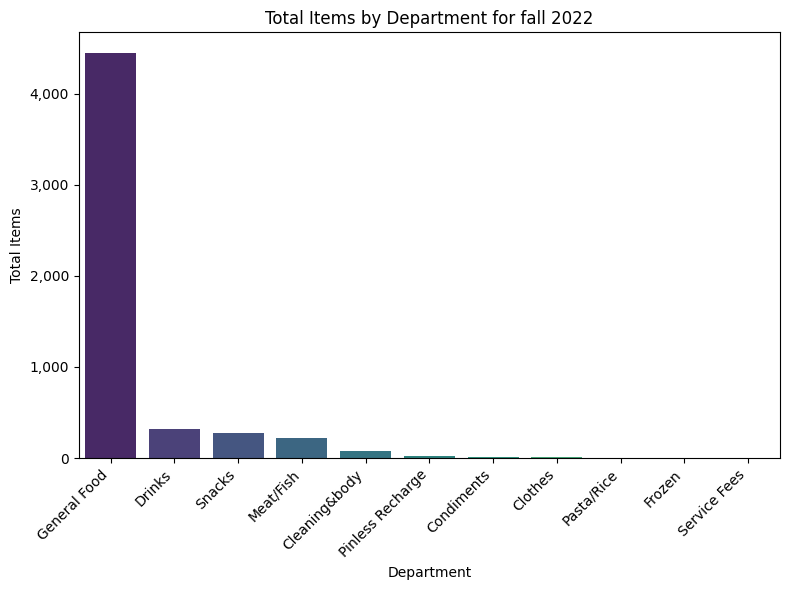

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_data22_23, palette='viridis')  # Added a color palette


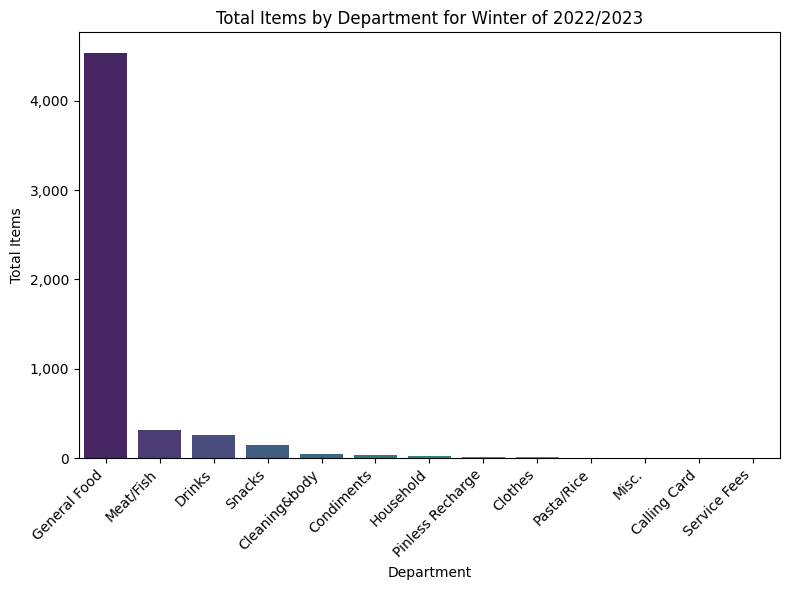

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_spring2023, palette='viridis')  # Added a color palette


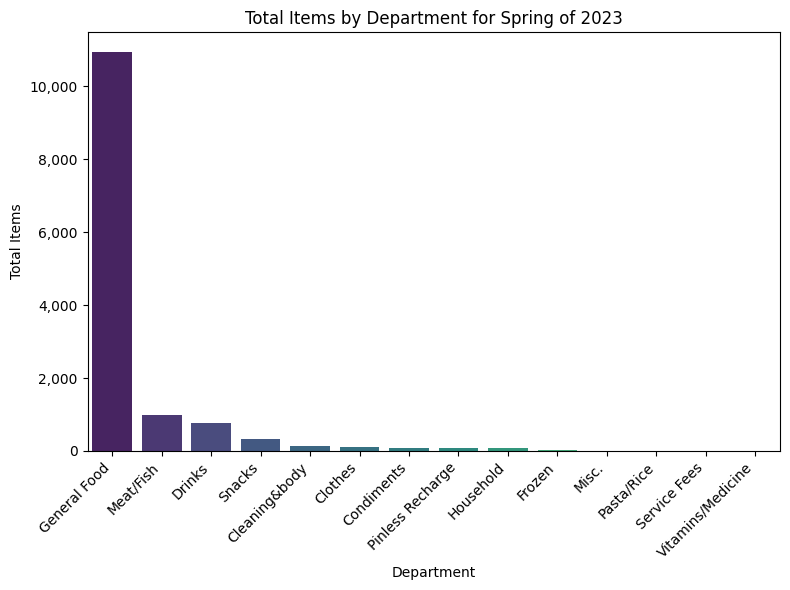

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_summer2023, palette='viridis')  # Added a color palette


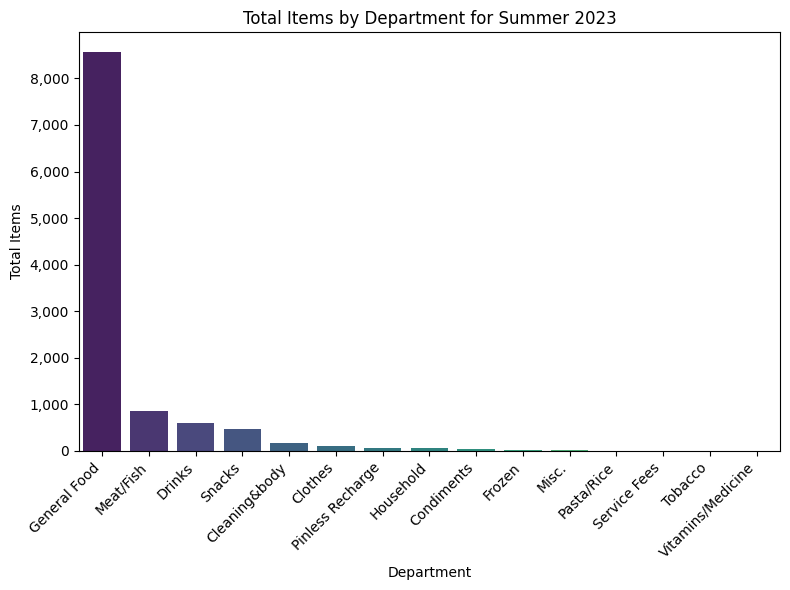

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_fall2023, palette='viridis')  # Added a color palette


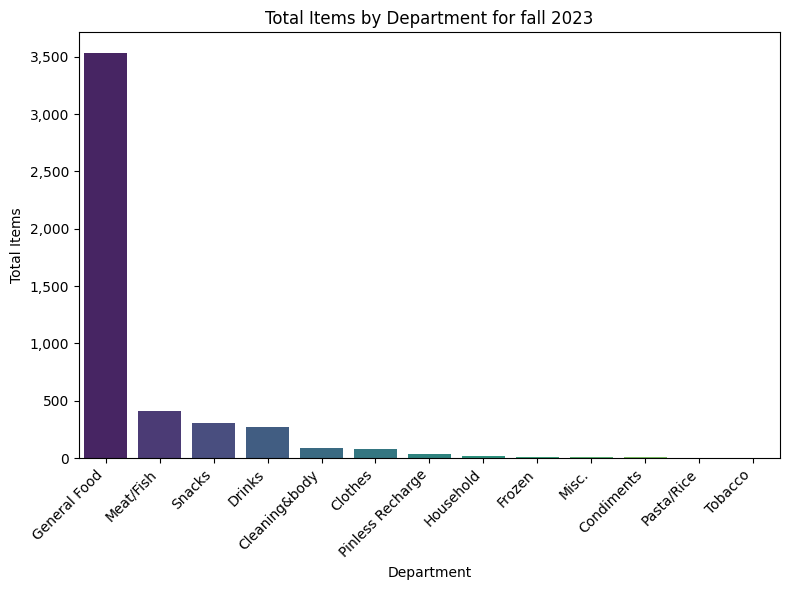

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:285: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_data23_24, palette='viridis')  # Added a color palette


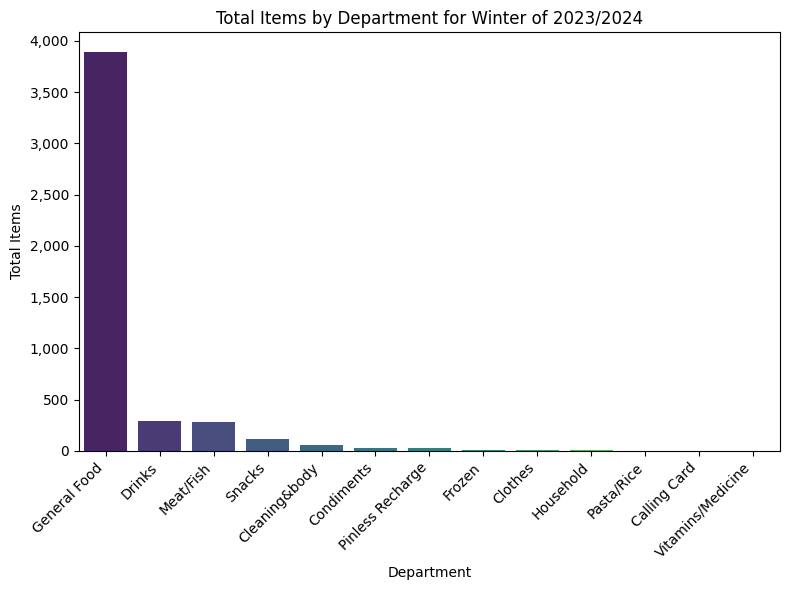

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:303: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_spring2024, palette='viridis')  # Added a color palette


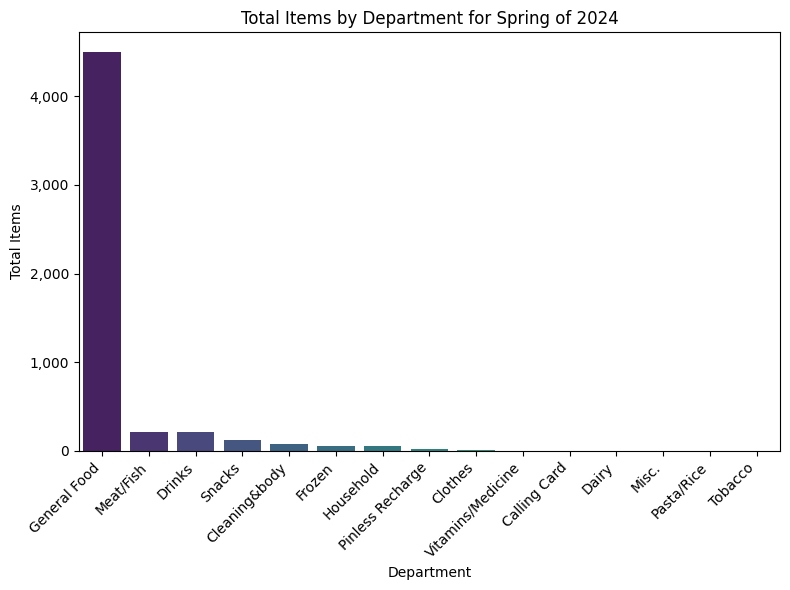

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:328: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_summer2024, palette='viridis')  # Added a color palette


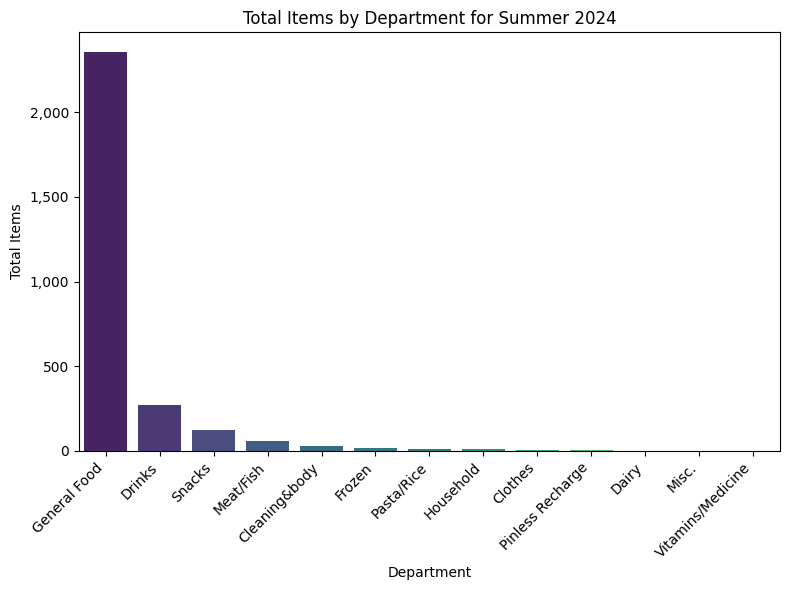

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:350: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_fall2024, palette='viridis')  # Added a color palette


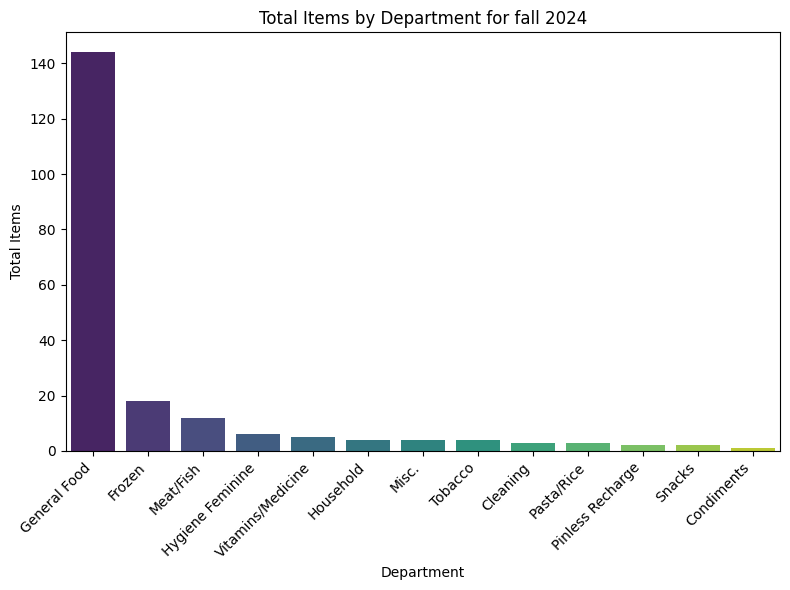

/var/folders/43/8j7k11j14gq9_lc1z7hz3lnc0000gn/T/ipykernel_64918/1329729691.py:372: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Items', data=sum_data24_25, palette='viridis')  # Added a color palette


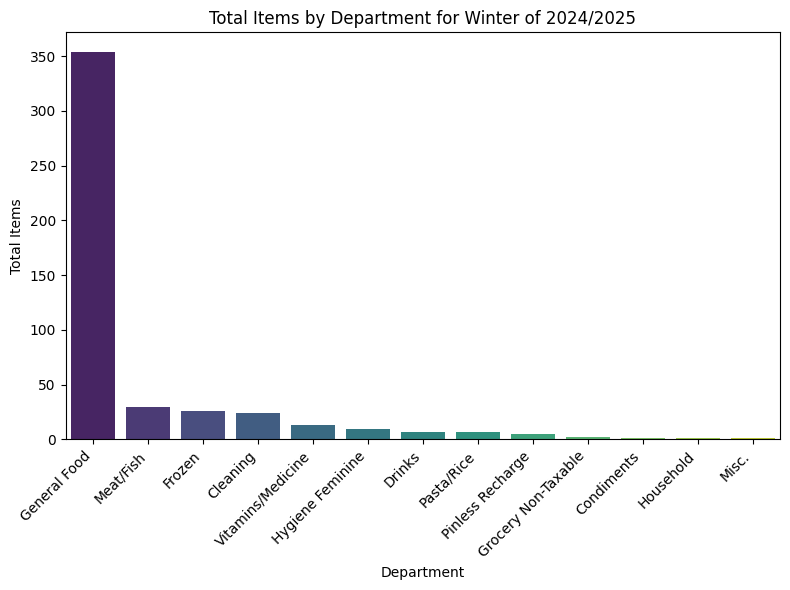

In [33]:
sum_data20_21 = df_winter20_21.groupby('Department')['Items'].sum().reset_index()
sum_data20_21 = sum_data20_21.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_data20_21, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Winter of 2020/2021")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_spring2021 = df_spring2021.groupby('Department')['Items'].sum().reset_index()
sum_spring2021 = sum_spring2021.sort_values('Items', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_spring2021, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Spring of 2021")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_summer2021 = df_summer2021.groupby('Department')['Items'].sum().reset_index()
sum_summer2021 = sum_summer2021.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_summer2021, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Summer 2021")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_fall2021 = df_fall2021.groupby('Department')['Items'].sum().reset_index()
sum_fall2021 = sum_fall2021.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_fall2021, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for fall 2021")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


#New data



sum_data21_22 = df_winter21_22.groupby('Department')['Items'].sum().reset_index()
sum_data21_22 = sum_data21_22.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_data21_22, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for winter of 2021/2022")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_spring2022 = df_spring2022.groupby('Department')['Items'].sum().reset_index()
sum_spring2022 = sum_spring2022.sort_values('Items', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_spring2022, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Spring of 2022")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_summer2022 = df_summer2022.groupby('Department')['Items'].sum().reset_index()
sum_summer2022 = sum_summer2022.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_summer2022, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Summer 2022")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_fall2022 = df_fall2022.groupby('Department')['Items'].sum().reset_index()
sum_fall2022 = sum_fall2022.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_fall2022, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for fall 2022")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()




#new data



sum_data22_23 = df_winter22_23.groupby('Department')['Items'].sum().reset_index()
sum_data22_23 = sum_data22_23.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_data22_23, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Winter of 2022/2023")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_spring2023 = df_spring2023.groupby('Department')['Items'].sum().reset_index()
sum_spring2023 = sum_spring2023.sort_values('Items', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_spring2023, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Spring of 2023")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_summer2023 = df_summer2023.groupby('Department')['Items'].sum().reset_index()
sum_summer2023 = sum_summer2023.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_summer2023, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Summer 2023")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_fall2023 = df_fall2023.groupby('Department')['Items'].sum().reset_index()
sum_fall2023 = sum_fall2023.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_fall2023, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for fall 2023")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()







#new data

sum_data23_24 = df_winter23_24.groupby('Department')['Items'].sum().reset_index()
sum_data23_24 = sum_data23_24.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_data23_24, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Winter of 2023/2024")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_spring2024 = df_spring2024.groupby('Department')['Items'].sum().reset_index()
sum_spring2024 = sum_spring2024.sort_values('Items', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_spring2024, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Spring of 2024")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


# # Check for missing sales data
# if df_food2['Sales'].isnull().any():
#     print("Warning: Missing sales data found. Consider handling NaN values.")

sum_summer2024 = df_summer2024.groupby('Department')['Items'].sum().reset_index()
sum_summer2024 = sum_summer2024.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_summer2024, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Summer 2024")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_fall2024 = df_fall2024.groupby('Department')['Items'].sum().reset_index()
sum_fall2024 = sum_fall2024.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_fall2024, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for fall 2024")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()



sum_data24_25 = df_winter24_25.groupby('Department')['Items'].sum().reset_index()
sum_data24_25 = sum_data24_25.sort_values('Items', ascending=False)



# vertical_concat_sum = pd.concat([sum_data20_21, sum_spring2021], axis=0, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='Items', data=sum_data24_25, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Winter of 2024/2025")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()


In [ ]:
df_winter20_21.value_counts('Items')


In [ ]:
sum_items20_21 = df_winter20_21.groupby('Department')['Items'].sum().reset_index()
sum_items20_21 = sum_items20_21.sort_values('Items', ascending = False)
sum_items20_21

In [ ]:
sum_items20_21 = df_winter20_21.groupby('Department')['Items'].sum().reset_index()
sum_items20_21 = sum_items20_21.sort_values('Items', ascending=False)


plt.figure(figsize=(16, 10))
sns.barplot(x='Department', y='Items', data=sum_items20_21, palette='viridis')  # Added a color palette
plt.xticks(rotation=45, ha="right")  # Rotated and aligned x-axis labels
plt.title("Total Items by Department for Winter of 2020/2021")
plt.xlabel("Department")
plt.ylabel("Total Items") #Added y axis label
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format the y axis with $ and commas

plt.tight_layout() #adjusts plot parameters for a tight layout

plt.show()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

df = df.set_index("Date")

df.plot()

In [ ]:
df

In [ ]:
df_food4 = df.drop(columns= ["Avg_Sale", "Scan_Sales", "Scan_Rate", "Baskets", "Items", "Avg_Items"])
df_food4

In [ ]:
df_food3.columns = df_food3.columns.str.strip()
df_food3.columns


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df.set_index('Date', inplace=True)

# Plot the original time series data
plt.figure(figsize=(7, 5))
plt.plot(df, label='Original Time Series')
plt.title('Inventory Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend()
plt.show()

In [ ]:
'''concatenate all 4 df's for seasons'''

# Here We explore a dataset that has specific product name and its respective department, the initial data we are working with does not have specific product names that are driving sales, so we can use this dataset to showcase how this can look like in the future for BeniFoods. This will help narrow the scope of how they can manage optimization with certian products in the future in terms of demand during the time of year. This data will help us define which pro